In [46]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from prepare import get_store_data, convert_date, get_converted_data, prep_store_data

ImportError: cannot import name 'prep_store_data' from 'prepare' (/Users/dad/codeup-data-science/ds-methodologies-exercises/time_series/prepare.py)

In [47]:
df = get_store_data()

In [3]:
df.head(3)

,sale_amount,sale_date,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [4]:
df.isnull().sum()

sale_amount      0
sale_date        0
sale_id          0
item_brand       0
item_id          0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
store_address    0
store_city       0
store_id         0
store_state      0
store_zipcode    0
dtype: int64

In [5]:
df.shape

(913000, 14)

In [6]:
df.store_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [7]:
df.item_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [8]:
df.item_price.unique()

array([0.84, 6.44, 2.43, 3.14, 2.61, 6.93, 9.64, 1.68, 1.79, 3.17, 3.93,
       8.4 , 6.47, 7.54, 9.11, 5.17, 1.16, 4.39, 0.74, 5.62, 8.09, 7.31,
       1.78, 5.34, 0.98, 6.01, 7.52, 8.65, 8.39, 4.21, 0.68, 6.52, 4.17,
       5.19, 7.95, 9.59, 3.45, 9.02, 0.6 , 2.97, 7.06, 4.4 , 4.65, 7.38,
       3.72, 9.54, 5.2 ])

In [9]:
df.sale_date.unique()

array(['Tue, 01 Jan 2013 00:00:00 GMT', 'Wed, 02 Jan 2013 00:00:00 GMT',
       'Thu, 03 Jan 2013 00:00:00 GMT', ...,
       'Fri, 29 Dec 2017 00:00:00 GMT', 'Sat, 30 Dec 2017 00:00:00 GMT',
       'Sun, 31 Dec 2017 00:00:00 GMT'], dtype=object)

In [10]:
df.sale_amount.unique()

array([ 13.,  11.,  14.,  10.,  12.,   9.,   7.,   5.,  16.,  18.,  15.,
         8.,   6.,  21.,  20.,  17.,  22.,  19.,  24.,  23.,  26.,  25.,
        27.,  38.,  34.,  29.,  31.,  30.,   4.,  36.,  28.,  33.,  32.,
        37.,  35.,  43.,  40.,  41.,  39.,  42.,  50.,  44.,  46.,  49.,
        48.,  52.,  58.,  51.,  45.,  53.,  57.,  54.,  60.,  63.,  69.,
        64.,  55.,  67.,  65.,  56.,  47.,  71.,  61.,  73.,  62.,  82.,
        78.,  68.,  74.,  59.,  70.,  87.,  66.,  77.,  88.,  76.,  75.,
       102.,  72.,  92.,  86.,  79.,  85.,  81.,  90.,  84.,  80., 103.,
        97.,  96.,  95.,  89., 104.,  94., 100.,  91.,  83., 106., 101.,
        98., 115.,   3.,  99.,  93., 105., 110., 108., 111., 114., 112.,
       116., 121., 120., 117., 113., 107., 109., 118., 137., 128., 127.,
       122., 119., 131., 123., 124., 125., 133., 134., 132., 129., 126.,
       139., 130., 143., 147., 141., 135., 140., 136., 154., 146., 150.,
       155., 145.,   1., 142., 153., 151., 149., 13

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_amount    913000 non-null  float64
 1   sale_date      913000 non-null  object 
 2   sale_id        913000 non-null  int64  
 3   item_brand     913000 non-null  object 
 4   item_id        913000 non-null  int64  
 5   item_name      913000 non-null  object 
 6   item_price     913000 non-null  float64
 7   item_upc12     913000 non-null  int64  
 8   item_upc14     913000 non-null  int64  
 9   store_address  913000 non-null  object 
 10  store_city     913000 non-null  object 
 11  store_id       913000 non-null  int64  
 12  store_state    913000 non-null  object 
 13  store_zipcode  913000 non-null  int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 104.5+ MB


### Takeaways:
1. there are no missing values
2. there are 913,000 rows
3. store_id ranges from 1 to 10
4. item_id ranges from 1 to 50


In [12]:
# # convert sale_date to DateTime Index
# df['sale_date'] = pd.to_datetime(df.sale_date)
# df = df.set_index('sale_date').sort_index()
df = convert_date(df)

Acquired sales_date_converted.csv from local storage
Reading to dataframe ...


In [13]:
df.head(5)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01 00:00:00+00:00,26.0,295813,Ducal,17,Ducal Refried Red Beans,1.16,88313590791,88313590791,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01 00:00:00+00:00,32.0,125995,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231
2013-01-01 00:00:00+00:00,45.0,314073,Scotch,18,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,21200725340,21200725340,2118 Fredericksburg Rdj,San Antonio,3,TX,78201
2013-01-01 00:00:00+00:00,34.0,332333,Careone,19,Careone Family Comb Set - 8 Ct,0.74,41520035646,41520035646,2118 Fredericksburg Rdj,San Antonio,3,TX,78201


In [14]:
df.shape[0], df.sale_id.nunique()

(913000, 913000)

In [15]:
df.loc['2016'].head(3)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2016-01-01 00:00:00+00:00,40.0,875750,Dove,48,Dove Men + Care Antiperspirant Deodorant Cool ...,3.72,79400271631,79400271631,8503 NW Military Hwy,San Antonio,10,TX,78231
2016-01-01 00:00:00+00:00,48.0,127090,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,8503 NW Military Hwy,San Antonio,10,TX,78231
2016-01-01 00:00:00+00:00,89.0,506898,Usda Produce,28,Guava,7.52,719175900007,719175900007,15000 San Pedro Ave,San Antonio,8,TX,78232


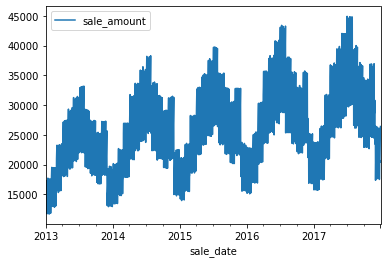

In [16]:
# chart daily sum of sales amount
by_date = df.groupby(['sale_date'])['sale_amount'].sum().reset_index()
by_date.plot(x='sale_date', y='sale_amount')

In [17]:
df.store_id.nunique()

10

In [18]:
df.store_id.value_counts()

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store_id, dtype: int64

In [19]:
df[df.store_id == 1].head(3)

,sale_amount,sale_id,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_id,store_state,store_zipcode
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01 00:00:00+00:00,16.0,456501,Triaminic,26,Triaminic Syrup Night Time Cold & Cough Grape 4oz,0.98,300436344045,300436344045,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2013-01-01 00:00:00+00:00,14.0,474761,Morton,27,Morton Kosher Salt Coarse,6.01,24600017008,24600017008,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [22]:
# number of unique items
# how many unique sold across all stores
# item_id works too

df.item_name.nunique()

50

In [23]:
df.item_name.value_counts().describe()

count       50.0
mean     18260.0
std          0.0
min      18260.0
25%      18260.0
50%      18260.0
75%      18260.0
max      18260.0
Name: item_name, dtype: float64

### Explore items and stores
- the count = number of items
- the mean = number of sales of each

In [24]:
first_sale_per_store_item = df.reset_index().groupby(['store_id', 'item_id']).sale_date.min()
first_sale_per_store_item[0:5]

store_id  item_id
1         1         2013-01-01 00:00:00+00:00
          2         2013-01-01 00:00:00+00:00
          3         2013-01-01 00:00:00+00:00
          4         2013-01-01 00:00:00+00:00
          5         2013-01-01 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, UTC]

#### Let's find out if each of the oldest and newest sale_date values are unique:

In [26]:
# find out if there is only one unique value
first_sale_per_store_item.unique()

<DatetimeArray>
['2013-01-01 00:00:00+00:00']
Length: 1, dtype: datetime64[ns, UTC]

<div class="alert alert-block alert-success">
Are the oldest sale_date values unique?

[x] Yes

[] No
</div>

In [29]:
last_sale_per_store_item = df.reset_index().groupby(['store_id', 'item_id']).sale_date.max()
last_sale_per_store_item[0:5]

store_id  item_id
1         1         2017-12-31 00:00:00+00:00
          2         2017-12-31 00:00:00+00:00
          3         2017-12-31 00:00:00+00:00
          4         2017-12-31 00:00:00+00:00
          5         2017-12-31 00:00:00+00:00
Name: sale_date, dtype: datetime64[ns, UTC]

In [30]:
# are these each unique
last_sale_per_store_item.unique()

<DatetimeArray>
['2017-12-31 00:00:00+00:00']
Length: 1, dtype: datetime64[ns, UTC]

<div class="alert alert-block alert-success">
Are the newest sale_date values unique?

[x] Yes

[] No
</div>

- On how many different days was each item sold at each store?

In [31]:
days_per_store_item = df.reset_index().groupby(['store_id', 'item_id']).sale_date.nunique()
days_per_store_item[0:5]

store_id  item_id
1         1          1826
          2          1826
          3          1826
          4          1826
          5          1826
Name: sale_date, dtype: int64

In [32]:
days_per_store_item.unique()

array([1826])

## Grouping by dates to aggregate values

In [33]:
# quantity of items sold per day
df.groupby('sale_date').sale_amount.sum().head()

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-02 00:00:00+00:00    13678.0
2013-01-03 00:00:00+00:00    14488.0
2013-01-04 00:00:00+00:00    15677.0
2013-01-05 00:00:00+00:00    16237.0
Name: sale_amount, dtype: float64

## Resampling
- change the time window of focus

#### Downsampling

In [34]:
downsampling_example = df.groupby('sale_date').sale_amount.sum().asfreq('12H')
downsampling_example.head()

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-01 12:00:00+00:00        NaN
2013-01-02 00:00:00+00:00    13678.0
2013-01-02 12:00:00+00:00        NaN
2013-01-03 00:00:00+00:00    14488.0
Freq: 12H, Name: sale_amount, dtype: float64

In [35]:
# .ffill "forward fills" nulls with last good value
downsampling_example.ffill().head()

sale_date
2013-01-01 00:00:00+00:00    13696.0
2013-01-01 12:00:00+00:00    13696.0
2013-01-02 00:00:00+00:00    13678.0
2013-01-02 12:00:00+00:00    13678.0
2013-01-03 00:00:00+00:00    14488.0
Freq: 12H, Name: sale_amount, dtype: float64

<div class="alert alert-block alert-danger">
    <p>Do not do this &#x25BC, it drops data</p>
</div>

In [ ]:
# upsampling w/o using .resample is bad
df.groupby('sale_date').sale_amount.sum().asfreq('W')

In [37]:
# not the right answer
df.loc['2013-01-06'].sale_amount.sum()

17291.0

- resample

In [39]:
# .resample applies the agg func to all datapoints in the time frame to
# produce the appropriate answer
# by week - W
df.sale_amount.resample('W').sum().head()

sale_date
2013-01-06 00:00:00+00:00     91067.0
2013-01-13 00:00:00+00:00    103902.0
2013-01-20 00:00:00+00:00    102950.0
2013-01-27 00:00:00+00:00    103298.0
2013-02-03 00:00:00+00:00    109027.0
Freq: W-SUN, Name: sale_amount, dtype: float64

In [40]:
# by month - M
df.sale_amount.resample('M').sum().head()

sale_date
2013-01-31 00:00:00+00:00    454904.0
2013-02-28 00:00:00+00:00    459417.0
2013-03-31 00:00:00+00:00    617382.0
2013-04-30 00:00:00+00:00    682274.0
2013-05-31 00:00:00+00:00    763242.0
Freq: M, Name: sale_amount, dtype: float64

In [41]:
# by year - Y
df.sale_amount.resample('Y').sum()

sale_date
2013-12-31 00:00:00+00:00     7941243.0
2014-12-31 00:00:00+00:00     9135482.0
2015-12-31 00:00:00+00:00     9536887.0
2016-12-31 00:00:00+00:00    10357160.0
2017-12-31 00:00:00+00:00    10733740.0
Freq: A-DEC, Name: sale_amount, dtype: float64

## Check for time gaps

In [44]:
print(f'Number of rows: {df.index.nunique()}')
print(f'Number of timedeltas of a day {df.index.max() - df.index.min() + timedelta(days=1)}')

Number of rows: 1826
Number of timedeltas of a day 1826 days 00:00:00


## Handling nulls

In [45]:
# In this example of downsampling, we have daily data and downsample to 12 hour frequency
nan_example = df.groupby("sale_date").sum().asfreq("12H")[["sale_amount"]]
nan_example["ffill"] = nan_example.sale_amount.ffill()
nan_example["bfill"] = nan_example.sale_amount.bfill()
nan_example.head()

,sale_amount,ffill,bfill
sale_date,,,
2013-01-01 00:00:00+00:00,13696.0,13696.0,13696.0
2013-01-01 12:00:00+00:00,NaN,13696.0,13678.0
2013-01-02 00:00:00+00:00,13678.0,13678.0,13678.0
2013-01-02 12:00:00+00:00,NaN,13678.0,14488.0
2013-01-03 00:00:00+00:00,14488.0,14488.0,14488.0
